# KMeans – Customer Segmentation

**Task:** AI & ML Internship – Task 12  

**Objective:**  
To segment customers using KMeans clustering based on income and spending score, determine optimal clusters using the Elbow method, and interpret customer segments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

Load Dataset (LOCAL FOLDER)

In [3]:
# Load dataset from local folder
data_path = "Database/Mall_Customers.csv.xls"

df = pd.read_csv(data_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Select Relevant Features

In [4]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Feature Scaling

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

Elbow Method

In [6]:
inertia = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

Elbow Plot (DELIVERABLE)

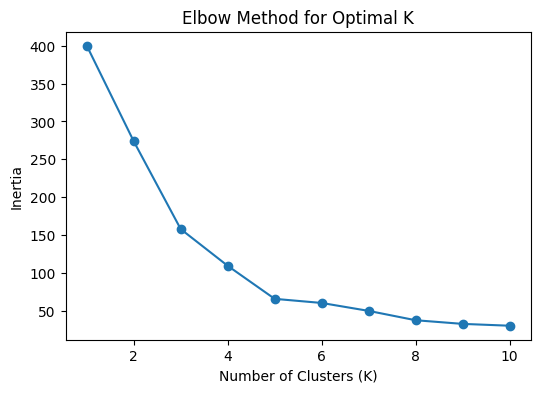

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("screenshots/elbow_plot.png", dpi=300, bbox_inches="tight")
plt.show()

Train KMeans with Optimal K

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


Cluster Visualization (DELIVERABLE)

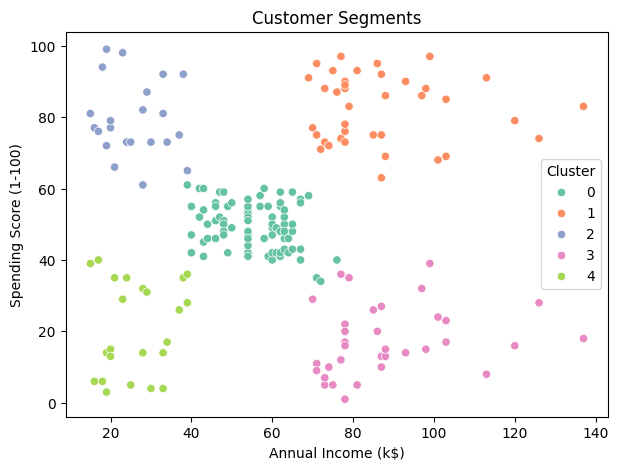

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segments")
plt.savefig("screenshots/cluster_visualization.png", dpi=300, bbox_inches="tight")
plt.show()

Save Segmented Dataset (DELIVERABLE)

In [10]:
import os

os.makedirs("output", exist_ok=True)

df.to_csv("output/segmented_customers.csv", index=False)

print("Segmented dataset saved successfully.")

Segmented dataset saved successfully.


## Cluster Interpretation

- **Cluster 0:** High income, high spending – Premium customers
- **Cluster 1:** Low income, low spending – Budget-conscious customers
- **Cluster 2:** High income, low spending – Careful spenders
- **Cluster 3:** Low income, high spending – Impulsive buyers
- **Cluster 4:** Average income and spending – Regular customers

## Final Outcome

- KMeans successfully segmented customers into meaningful groups.
- Elbow method helped identify optimal cluster count.
- Clustering enables targeted business strategies.
